# Load Data

In [4]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn')

Churn means the customers at the risk of closing the account

In [5]:
pd.set_option('display.max_columns', None)
raw_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Let's check the duplicate records
raw_df['customerID'].duplicated().any()

False

In [7]:
# setting the Customer IDs as Index as all of them are unique values
raw_df.set_index('customerID', inplace=True)
raw_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing and Exploratory Data Analysis

In [8]:
# Descriptive Statistics
raw_df.describe(include = "all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


As we can see there are many categorical features with more than 2 subcategories. So, let's understand the data distribution for each categorical column

In [9]:
# Analyzing the data distribution for each category in all categorical columns
# Looking at the data distribution for categorical columns
categorical_cols = [col for col in raw_df.columns if raw_df[col].dtype == object]
#categorical_cols.remove('customerID') # as this column will be unique for every record
categorical_cols

for col in categorical_cols:
    print(f'Column name is {col}\n')
    print(raw_df[col].value_counts())
    print('-------------------------------\n')  

Column name is gender

Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------

Column name is Partner

No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------

Column name is Dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------

Column name is PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------

Column name is MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------

Column name is InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------

Column name is OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-------------------------------

Column name is OnlineBackup


As we can see there are 1526 customers with "No internet service" for many categorical columns but they could be using Phone Service which tells us that we can't remove them from the dataset. 

Instead, we can convert "No Internet service" to "No" values. Similary, for Multiple Lines feature let's convert No Phone Service as No.
    

In [10]:
raw_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
cols = ['tenure','SeniorCitizen','MonthlyCharges', 'TotalCharges','Churn','gender','Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
raw_df = raw_df[cols]
raw_df.head()


,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,29.85,29.85,No,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
5575-GNVDE,34,0,56.95,1889.5,No,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
3668-QPYBK,2,0,53.85,108.15,Yes,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
7795-CFOCW,45,0,42.30,1840.75,No,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
9237-HQITU,2,0,70.70,151.65,Yes,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [12]:
#df.edjefe.replace(to_replace=['no', 'yes'], value=[0, 1])

In [13]:
# Converting TotalCharges feature to Numeric
raw_df['TotalCharges'] = pd.to_numeric(raw_df['TotalCharges'],errors = 'coerce')

# Replace Male=1 and Female=0 in the gender column
raw_df['gender'] = raw_df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

exl_col = ['gender','InternetService','Contract','PaymentMethod']

for col in cols:
    if col not in exl_col and raw_df[col].dtype == object:
        #if raw_df[col].dtype == object: #or (raw_df[col] not in exl_col)):
        raw_df[col] = raw_df[col].apply(lambda x: 1 if x == 'Yes' else 0)
raw_df.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,29.85,29.85,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check
5575-GNVDE,34,0,56.95,1889.50,0,1,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check
3668-QPYBK,2,0,53.85,108.15,1,1,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check
7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic)
9237-HQITU,2,0,70.70,151.65,1,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check


In [14]:
raw_df.shape


(7043, 20)

In [15]:
for col in raw_df.columns:
    print(f'Column name is {col}\n')
    print(raw_df[col].value_counts())
    print('-------------------------------\n')  

Column name is tenure

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
-------------------------------

Column name is SeniorCitizen

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------

Column name is MonthlyCharges

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64
-------------------------------

Column name is TotalCharges

20.20      11
19.75       9
20.05       8
19.65       8
19.90       8
           ..
6424.70     1
1474.35     1
6668.35     1
6096.90     1
5867.00     1
Name: TotalCharges, Length: 6530, dtype: int64
-------------------------------

Column name is Churn

0    5174
1    1869
Name: Churn, dtype: int64
-------------------------------

Column name is gender

1    3555
0    3488
Name: gender, d

In [16]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7032 non-null   float64
 4   Churn             7043 non-null   int64  
 5   gender            7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   PhoneService      7043 non-null   int64  
 9   MultipleLines     7043 non-null   int64  
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   int64  
 12  OnlineBackup      7043 non-null   int64  
 13  DeviceProtection  7043 non-null   int64  
 14  TechSupport       7043 non-null   int64  
 15  StreamingTV       7043 non-null   int64  
 16  StreamingMovies   7043 non-null 

In [17]:
# new = raw_df.loc[raw_df['tenure'] <=10]
# new = new.loc[new['Churn'] == 0]
# new.describe()

## Histograms

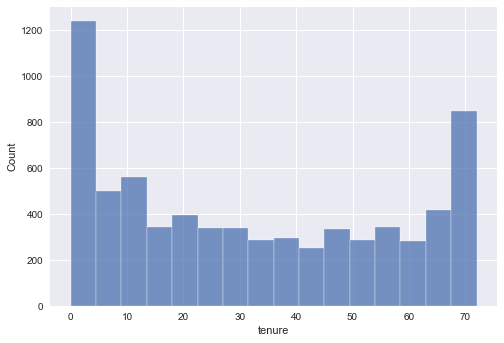

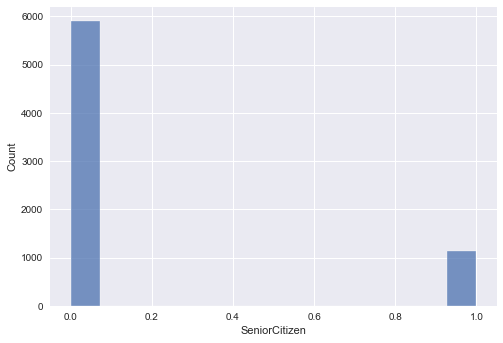

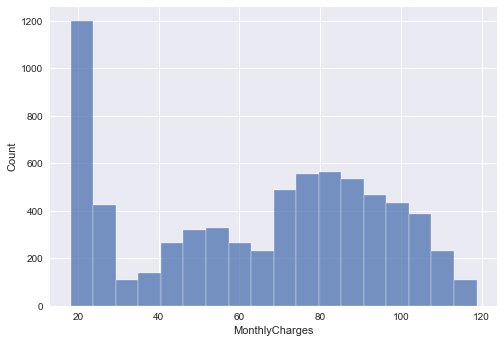

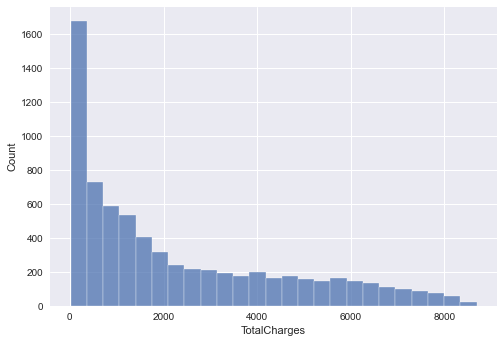

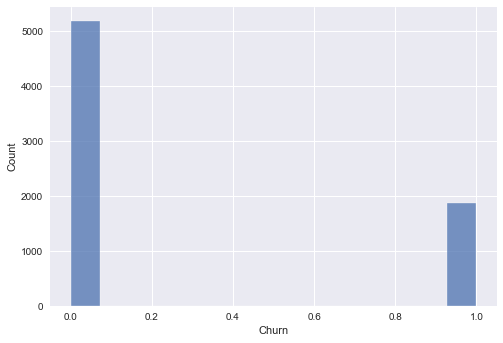

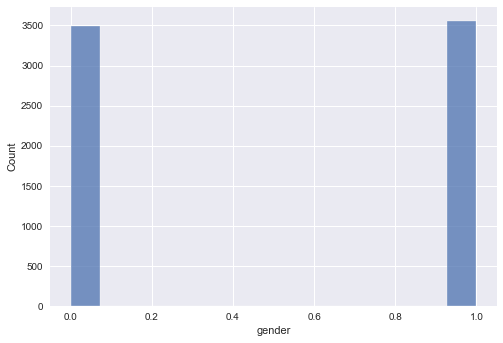

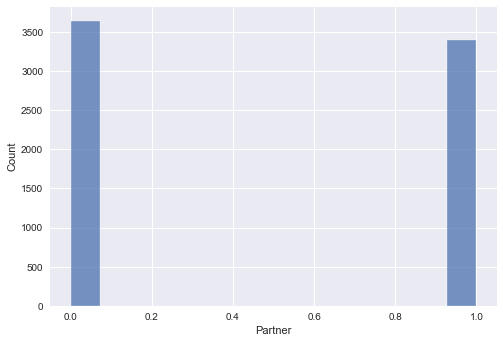

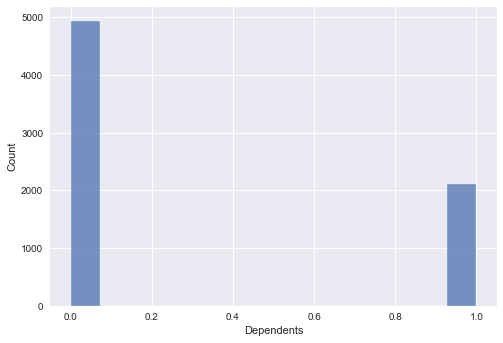

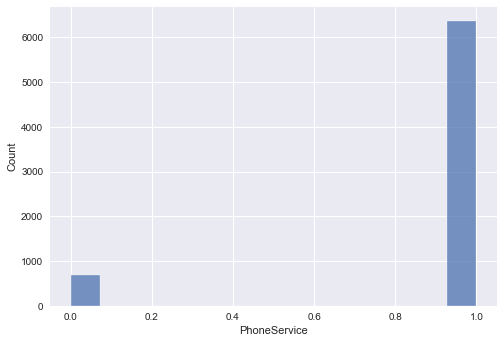

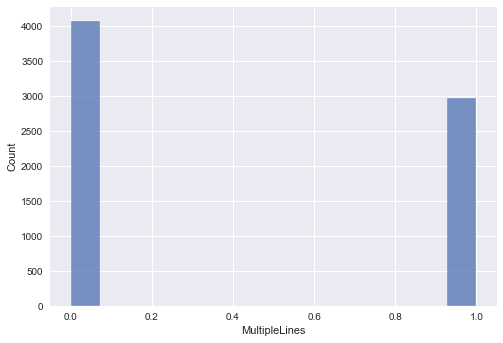

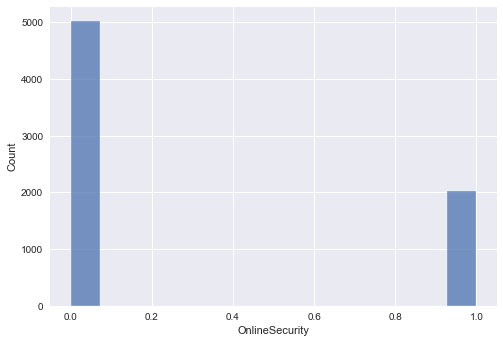

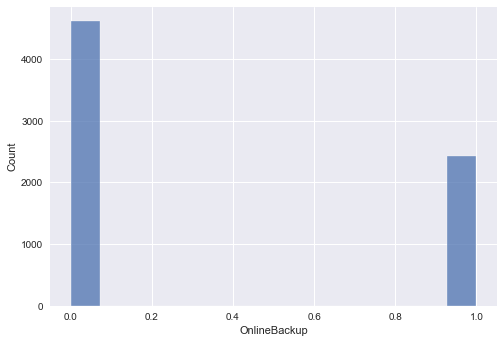

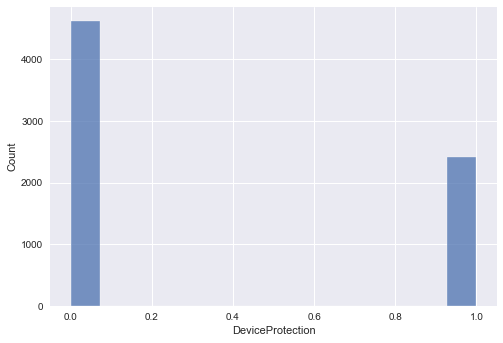

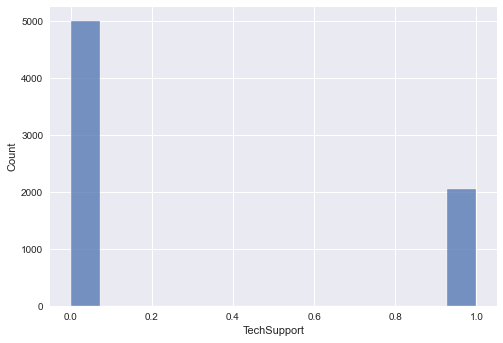

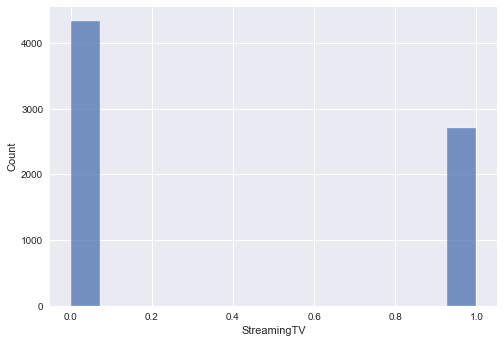

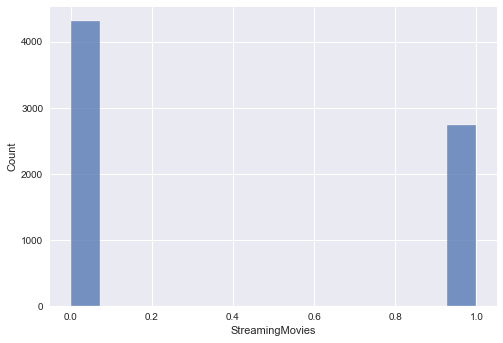

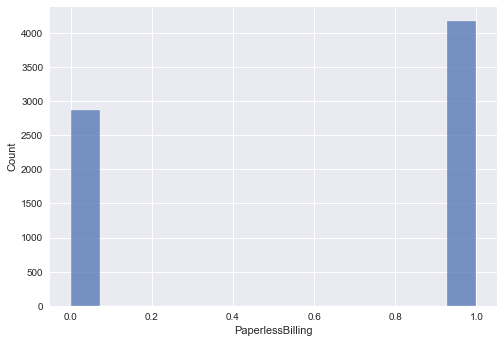

In [18]:
num_data = raw_df._get_numeric_data()

for i, col in enumerate(num_data.columns):
    plt.figure(i)
    sns.histplot(num_data[col])

## Boxplots

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


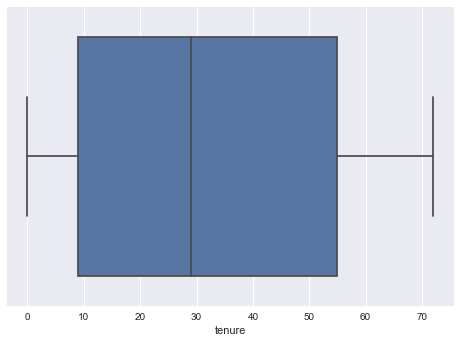

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


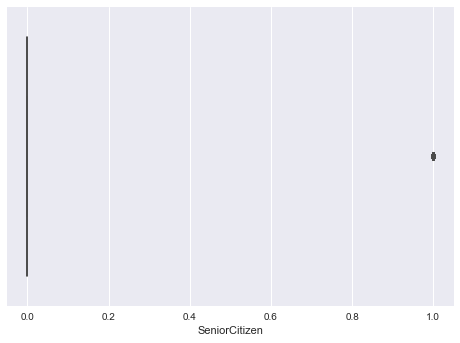

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


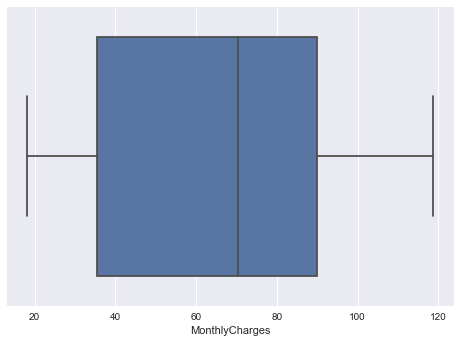

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


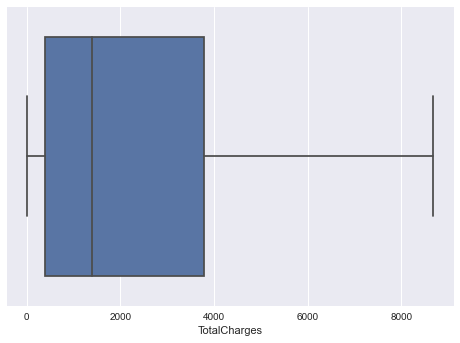

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


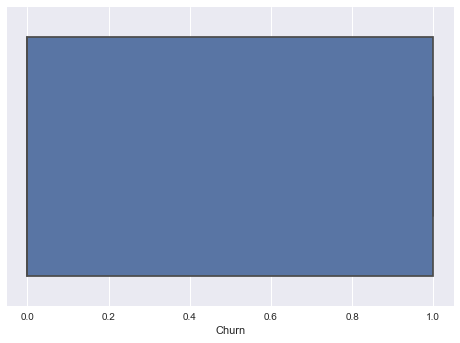

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


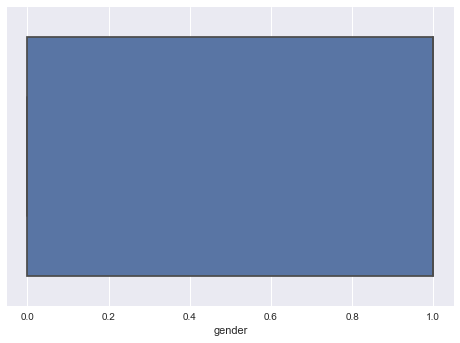

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


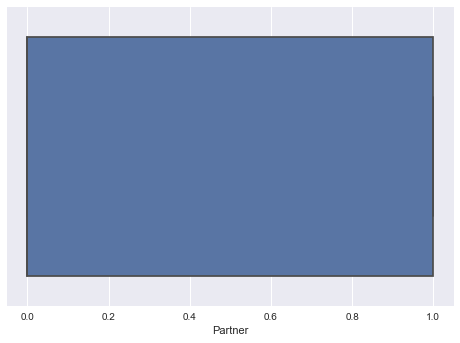

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


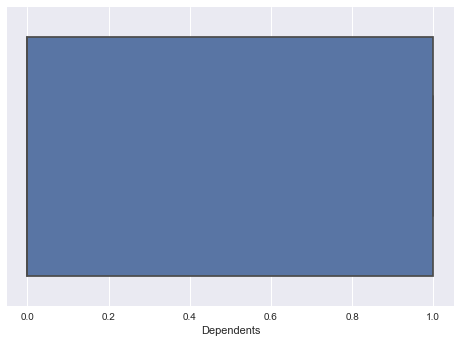

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


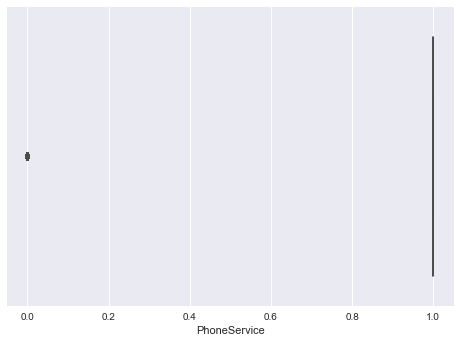

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


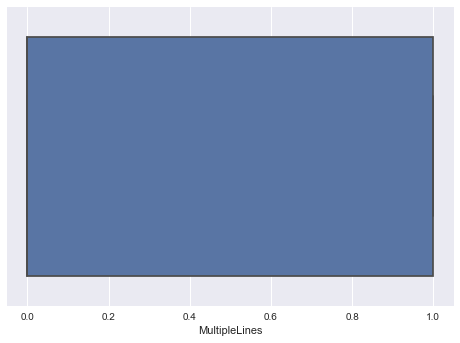

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


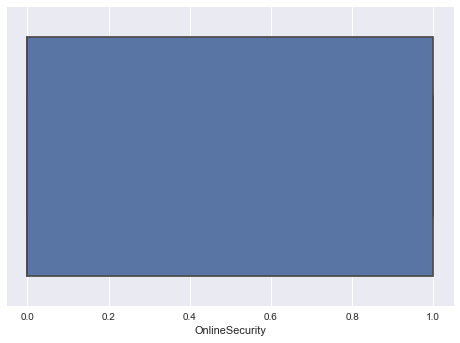

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


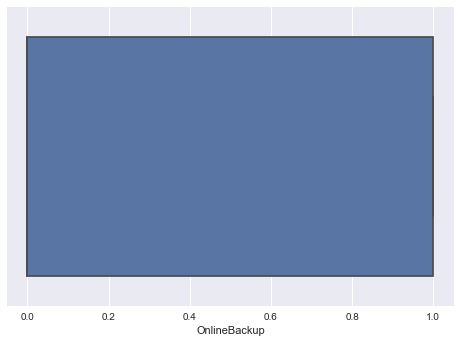

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


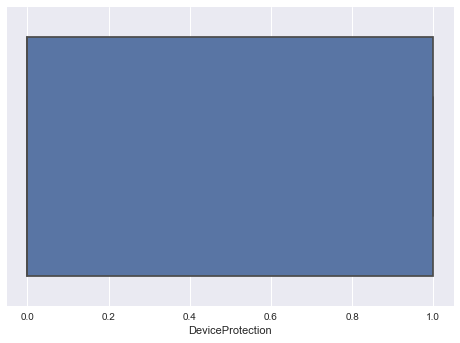

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


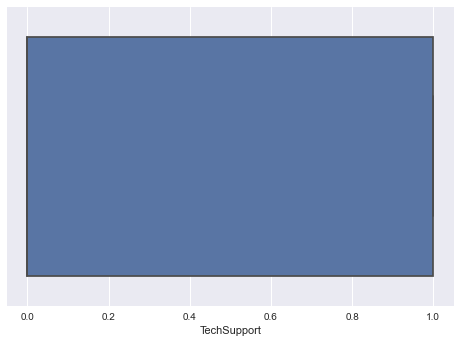

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


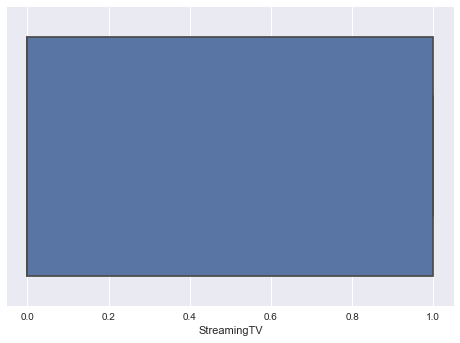

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


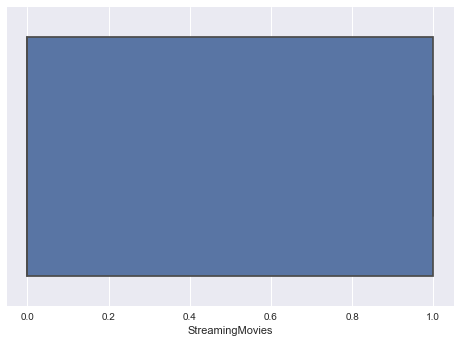

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


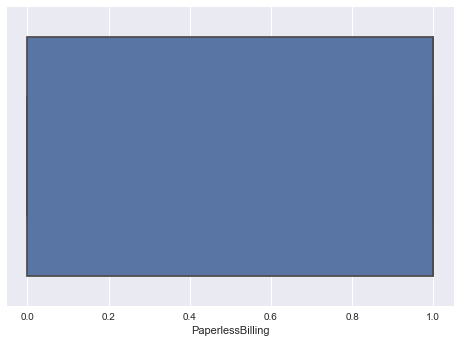

In [19]:
num_data = raw_df._get_numeric_data()

for i, col in enumerate(num_data.columns):
    plt.figure(i)
    sns.boxplot(num_data[col])
    plt.show()

## Outlier Analysis

In [20]:
# Performing Two sided Grubbs Test for outlier detection
from outliers import smirnov_grubbs as grubbs

for i, col in enumerate(num_data.columns):
    print("The outlier test for: ",num_data[col])
    grubbs.test(num_data[col])
    print("-------------------------------------")
    

The outlier test for:  customerID
7590-VHVEG     1
5575-GNVDE    34
3668-QPYBK     2
7795-CFOCW    45
9237-HQITU     2
              ..
6840-RESVB    24
2234-XADUH    72
4801-JZAZL    11
8361-LTMKD     4
3186-AJIEK    66
Name: tenure, Length: 7043, dtype: int64
-------------------------------------
The outlier test for:  customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: SeniorCitizen, Length: 7043, dtype: int64
-------------------------------------
The outlier test for:  customerID
7590-VHVEG     29.85
5575-GNVDE     56.95
3668-QPYBK     53.85
7795-CFOCW     42.30
9237-HQITU     70.70
               ...  
6840-RESVB     84.80
2234-XADUH    103.20
4801-JZAZL     29.60
8361-LTMKD     74.40
3186-AJIEK    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64
-------------------------------------
The outlier test for:  customerID
7590-VHVEG      

As we can see from above results of boxplot and two sided grubbs test that there are no outliers present

## Null or Missing Value Analysis and Imputation

In [21]:
# As we can see that there are Null or missing values in TotalCharges Column
raw_df.isnull().sum()

tenure               0
SeniorCitizen        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
dtype: int64

<AxesSubplot:>

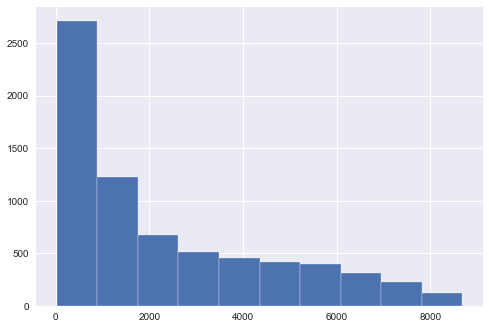

In [22]:
raw_df['TotalCharges'].hist()

In [23]:
raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].mean()).isnull().sum()

0

<AxesSubplot:>

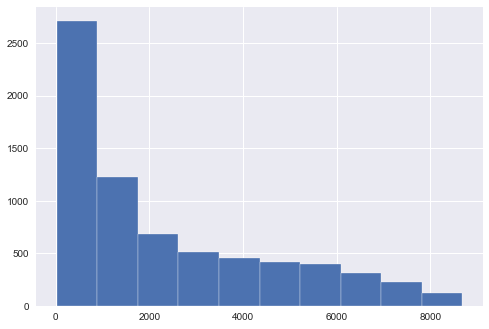

In [24]:
raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].mean()).hist()

In [25]:
raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].median()).isnull().sum()

0

<AxesSubplot:>

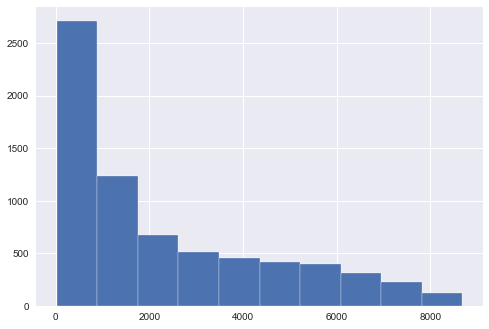

In [26]:
raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].median()).hist()

<AxesSubplot:>

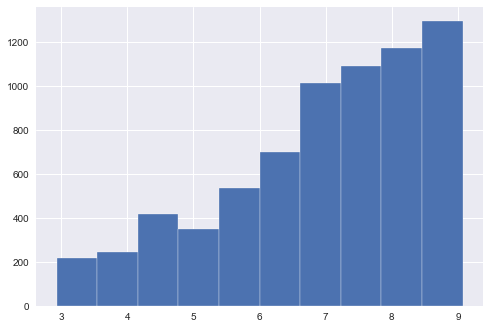

In [27]:
np.log(raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].median())).hist()

<AxesSubplot:>

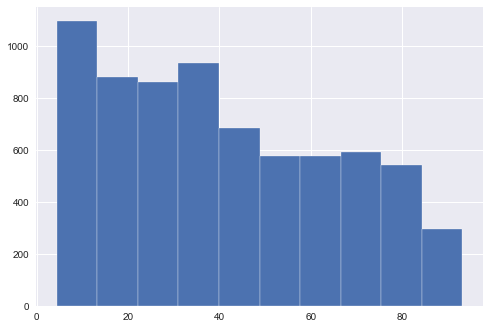

In [28]:
np.sqrt(raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].median())).hist()

<AxesSubplot:>

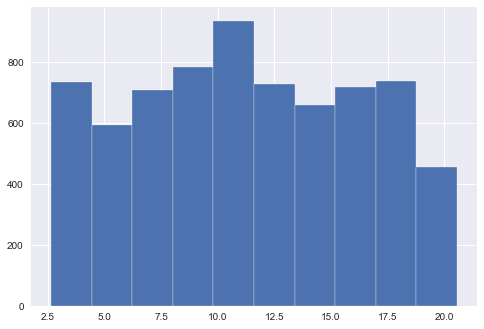

In [29]:
np.cbrt(raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].median())).hist()

<AxesSubplot:>

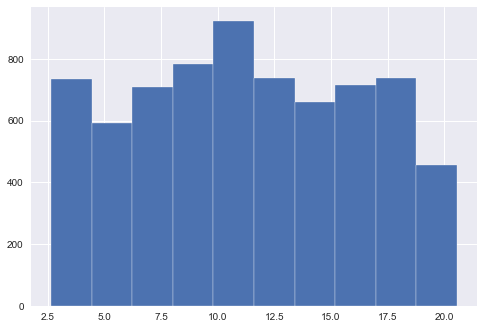

In [30]:
np.cbrt(raw_df['TotalCharges'].fillna(raw_df['TotalCharges'].mean())).hist()

In [31]:
#Creating a copy of original dataset to perform imputation and data transformation
df = raw_df.copy()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df['cbrt_TotalCharges'] = np.cbrt(df['TotalCharges'])

In [32]:
# # Looking at the data distribution for categorical columns
# categorical_cols = [col for col in df.columns if df[col].dtype == object]
# categorical_cols.remove('customerID') # as this column will be unique for every record
# categorical_cols

# Kaplan Meier Curve (Probability vs Time Curve)

In [33]:
# Creating KaplanMeier Curve

from lifelines import KaplanMeierFitter

# creating KMF object or instance
km = KaplanMeierFitter()

# Time to event data for censored events and events happened
duration = df['tenure']

# It has churned i.e 1 and censored i.e 0
event = df['Churn']

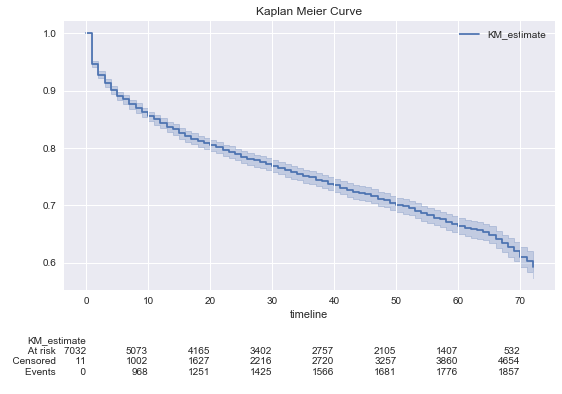

In [34]:
# fitting data to the KaplanMeierFitter model

km.fit(duration,event)#,label = "Kaplan Meier Estimate")

# Plotting the estimate
km.plot(at_risk_counts = True)

plt.title('Kaplan Meier Curve');

Try filtering on tenure columns 

At 10 months 5073 samples are at risk out of which 1002 are censored(Churn = 0) 

In [35]:
#km.median_survival_time_
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [36]:
categorical_cols.remove('TotalCharges')
categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Survival curves by gender


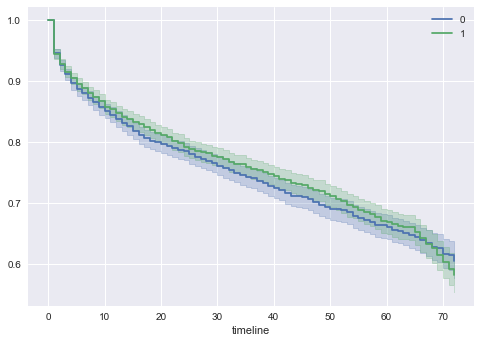

Survival curves by Partner


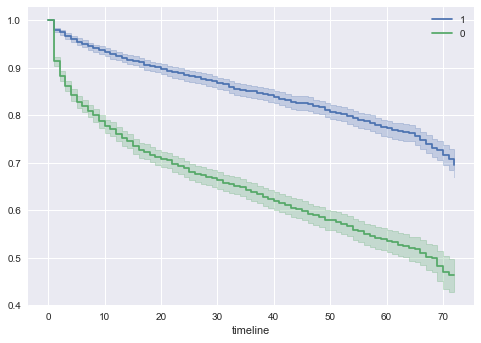

Survival curves by Dependents


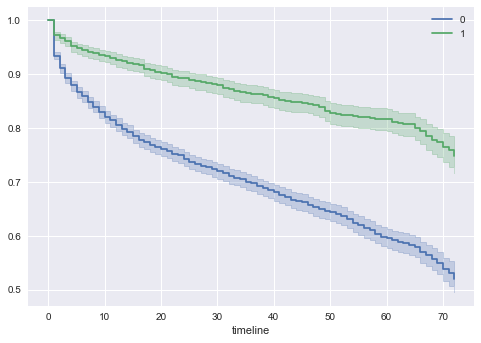

Survival curves by PhoneService


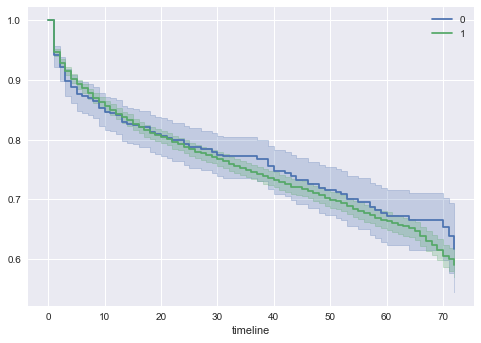

Survival curves by MultipleLines


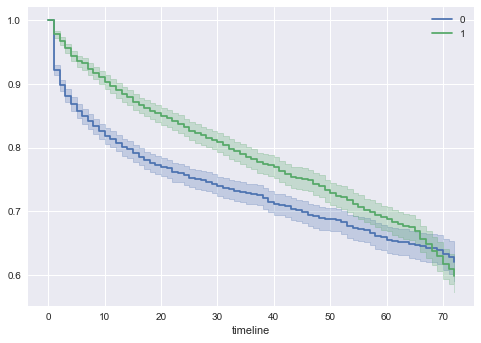

Survival curves by InternetService


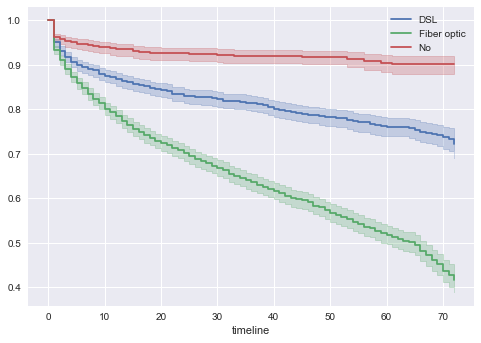

Survival curves by OnlineSecurity


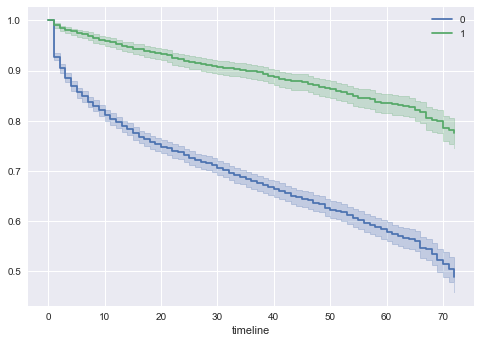

Survival curves by OnlineBackup


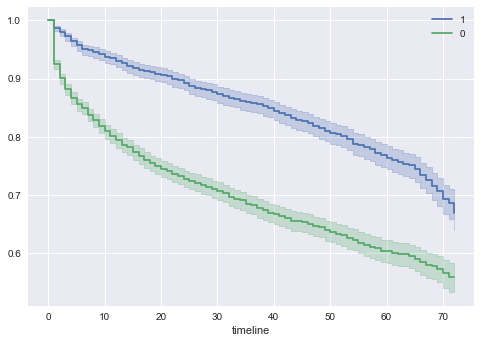

Survival curves by DeviceProtection


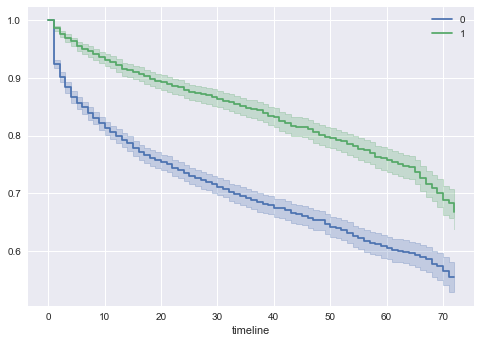

Survival curves by TechSupport


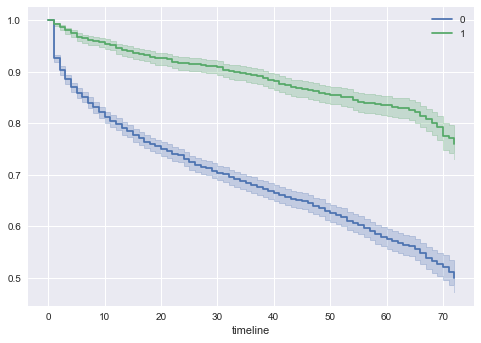

Survival curves by StreamingTV


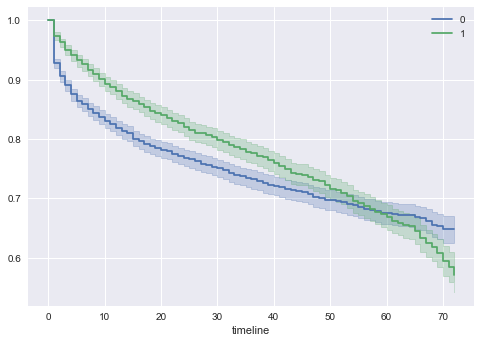

Survival curves by StreamingMovies


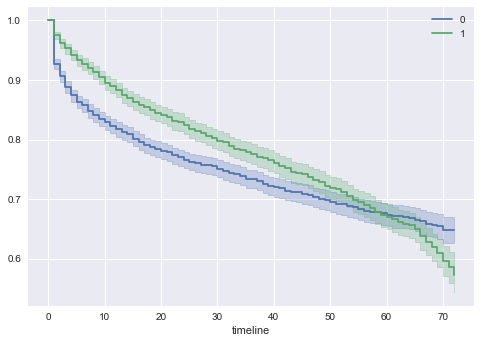

Survival curves by Contract


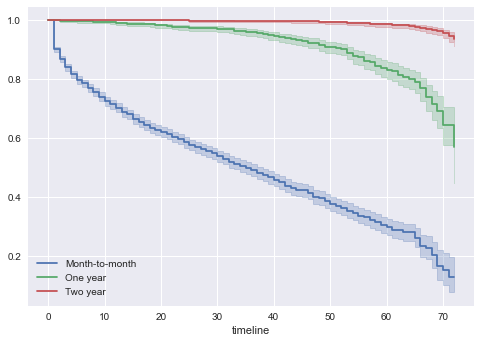

Survival curves by PaperlessBilling


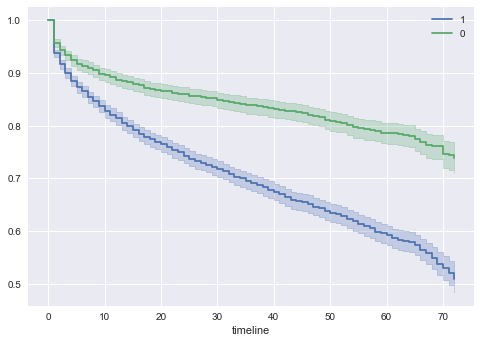

Survival curves by PaymentMethod


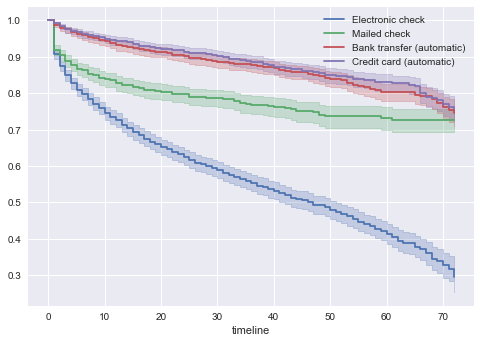

Survival curves by Churn


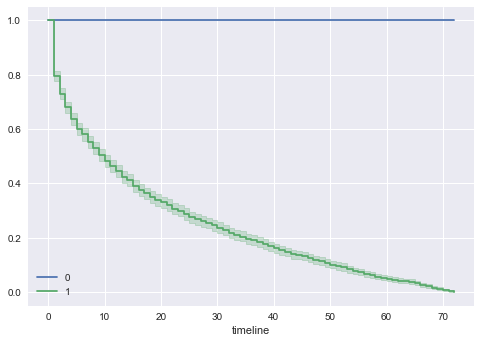

In [37]:
# Survival Curves for each Category

for col in categorical_cols:
    
    for category in df[col].unique():
        ax = plt.subplot(111)
        flag = df[col] == category
    
        km.fit(duration[flag], event_observed=event[flag], label=category)
        km.plot(ax=ax)

    print(f"Survival curves by {col}")
    plt.show()
    #plt.title("Survival curves by payment methods");
    


In [38]:
# Applying Log-rank test
from lifelines.statistics import (logrank_test,\
                                  pairwise_logrank_test,\
                                  multivariate_logrank_test,\
                                  survival_difference_at_fixed_point_in_time_test)

In [39]:
# Gender
# gender_male_flag = df['gender'] == 'Male'
# gender_female_flag = df['gender'] == 'Female'

gender_male_flag = df['gender'] == 1
gender_female_flag = df['gender'] == 0

results_gender = logrank_test(duration[gender_male_flag], 
                       duration[gender_female_flag], 
                       event[gender_male_flag], 
                       event[gender_female_flag])
results_gender.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

In [40]:
Z = results_gender.test_statistic
D = event.sum() # Total number of events

hazard_ratio = np.exp(Z*np.sqrt(4/D))
hazard_ratio

1.0246184594675585

The risk of churn is 1.02 times higher in female users compared to male users.

In [41]:
# Phone Service
# PhoneService_flag_Yes = df['PhoneService'] == 'Yes'
# PhoneService_flag_No = df['PhoneService'] == 'No'

PhoneService_flag_Yes = df['PhoneService'] == 1
PhoneService_flag_No = df['PhoneService'] == 0

results_phoneservice = logrank_test(duration[PhoneService_flag_Yes], 
                       duration[PhoneService_flag_No], 
                       event[PhoneService_flag_Yes], 
                       event[PhoneService_flag_No])
results_phoneservice.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

In [42]:
Z = results_phoneservice.test_statistic
D = event.sum() # Total number of events

hazard_ratio = np.exp(Z*np.sqrt(4/D))
hazard_ratio

1.0201305131657332

In [43]:
Z

0.43081859894149144

The risk of churn is 1.02 times higher with users having no phone service compared to users having phone service

In [44]:
# # Multiple Lines
# multiplelines_flag_nophoneservice = df['MultipleLines'] == 'No phone service'
# multiplelines_flag_yes = df['MultipleLines'] == 'Yes'

# results_mutiplelines = logrank_test(duration[multiplelines_flag_nophoneservice], 
#                        duration[multiplelines_flag_yes], 
#                        event[multiplelines_flag_nophoneservice], 
#                        event[multiplelines_flag_yes])
# results_mutiplelines.print_summary()

In [45]:
# Multiple Lines
results_pairwise_mutiplelines = pairwise_logrank_test(df['tenure'],df['MultipleLines'],df['Churn'])
results_pairwise_mutiplelines.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
     test_statistic      p  -log2(p)
0 1           24.85 <0.005     20.62

In [46]:
Z = results_pairwise_mutiplelines.test_statistic
D = event.sum() # Total number of events

hazard_ratio = np.exp(Z*np.sqrt(4/D))
hazard_ratio

array([3.15703557])

In [47]:
Z

array([24.85043854])

In [48]:
# Payment Method
results_pairwise_paymentmethod = pairwise_logrank_test(df['tenure'],df['PaymentMethod'],df['Churn'])
results_pairwise_paymentmethod.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
                                                   test_statistic      p  -log2(p)
Bank transfer (automatic) Credit card (automatic)            0.87   0.35      1.51
                          Electronic check                 510.04 <0.005    372.74
                          Mailed check                      51.07 <0.005     40.03
Credit card (automatic)   Electronic check                 539.74 <0.005    394.21
                          Mailed check                      64.82 <0.005     50.11
Electronic check          Mailed check                     152.46 <0.005    113.93

In [49]:
Z = results_pairwise_paymentmethod.test_statistic
D = event.sum() # Total number of events

hazard_ratio = np.exp(Z*np.sqrt(4/D))
hazard_ratio

array([1.04098683e+00, 1.76728077e+10, 1.06194931e+01, 6.98428932e+10,
       2.00551523e+01, 1.15621790e+03])

In [50]:
Z

array([  0.86829469, 510.03505896,  51.07185513, 539.74017745,
        64.81517439, 152.45545486])

# Cox Proportion Hazard Model (Survival Regression) Cox PH Fitter 

In [51]:
from lifelines import CoxPHFitter

In [52]:
df.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,cbrt_TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,29.85,29.85,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,3.102045
5575-GNVDE,34,0,56.95,1889.50,0,1,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,12.362766
3668-QPYBK,2,0,53.85,108.15,1,1,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,4.764407
7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),12.255516
9237-HQITU,2,0,70.70,151.65,1,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,5.332704


In [53]:
#Not Needed to segregate Churn =1 records
# dfnew = df.copy()
# dfnew = dfnew.loc[dfnew['Churn'] == 1]
# dfnew = dfnew.drop('customerID', axis = 1)
# print(dfnew.head())
# print("\n------------------------------\n")
# print(dfnew.describe(include = "all"))

**VIF to have the indpendent variables without multicolinearity**

'''
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

feature_vif = calc_vif(df_train.drop(['status', 'time'], axis=1))
feature_vif.sort_values('VIF')
'''

In [54]:
# Create Dummy variables
# dfnew = df.copy()
# dfnew = dfnew.drop(['customerID','cbrt_TotalCharges'], axis = 1)
# dfnew = dfnew.loc[:,['tenure','Churn','gender','Contract',\
#                     'Partner','Dependents','PhoneService',\
#                      'MonthlyCharges','TotalCharges','SeniorCitizen',\
#                      'StreamingTV','PaymentMethod']]
df_with_dummy = pd.get_dummies(df,drop_first = True)
df_with_dummy.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,cbrt_TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,3.102045,0,0,0,0,0,1,0
5575-GNVDE,34,0,56.95,1889.50,0,1,0,0,1,0,1,0,1,0,0,0,0,12.362766,0,0,1,0,0,0,1
3668-QPYBK,2,0,53.85,108.15,1,1,0,0,1,0,1,1,0,0,0,0,1,4.764407,0,0,0,0,0,0,1
7795-CFOCW,45,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,1,0,0,0,12.255516,0,0,1,0,0,0,0
9237-HQITU,2,0,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,1,5.332704,1,0,0,0,0,1,0


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
feature_vif = calc_vif(df_with_dummy.drop(['Churn', 'tenure'], axis=1)) 
feature_vif.sort_values('VIF')

,variables,VIF
0,SeniorCitizen,1.376507
5,Dependents,1.976106
20,PaymentMethod_Credit card (automatic),1.982919
3,gender,2.021555
18,Contract_One year,2.023858
22,PaymentMethod_Mailed check,2.346966
8,OnlineSecurity,2.729244
11,TechSupport,2.787097
4,Partner,2.825093
7,MultipleLines,2.918356


In [56]:
features_with_no_multicolinearity = list(feature_vif.loc[feature_vif['VIF'] < 10].variables)
features_with_no_multicolinearity.extend(['tenure','Churn'])
features_with_no_multicolinearity

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'Churn']

In [57]:
len(features_with_no_multicolinearity)

20

# Train Validation and Test Split

In [58]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
#from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from lifelines.utils import concordance_index,k_fold_cross_validation
#from lifelines.utils.

In [59]:
model_df = df_with_dummy[features_with_no_multicolinearity]
model_df.head()

,SeniorCitizen,gender,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
5575-GNVDE,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,34,0
3668-QPYBK,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,2,1
7795-CFOCW,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,45,0
9237-HQITU,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2,1


In [60]:
df_train,df_test = train_test_split(model_df, test_size = 0.20)

In [61]:
# Cross validation on the train data
cph = CoxPHFitter()
k_fold_cross_validation(cph,df_train,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

[0.8617519946076208,
 0.8697296336748669,
 0.863182162599666,
 0.8626524552857092,
 0.8511219003730525]

In [62]:
# Training the Model
cph.fit(df_train, duration_col = 'tenure', event_col = 'Churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 5634 total observations, 4153 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1481
   partial log-likelihood = -10728.74
         time fit was run = 2022-05-23 15:25:33 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
SeniorCitizen                          -0.04       0.96       0.06            -0.16             0.09                 0.85                 1.09
gender                                 -0.11       0.90       0.05            -0.21            -0.01                 0.81                 0.99
Partner                                -0.52       0.60       0.06            -0.64            -0.39                 0.53                 0.67
Dependents                             -0.10       0.90       0.08            -0.25             0.05                 0.78                 1.05
MultipleLines                          -0.30       0.74       0.06            -0.41            -0.19                 0.67                 0.83
OnlineSecurity                         -0.69       0.50       0.07            -0.84            -0.55                 0.43                 0.58
OnlineBackup                           -0.60       0.55       0.06            -0.72            -0.48                 0.49                 0.62
DeviceProtection                       -0.33       0.72       0.06            -0.45            -0.21                 0.64                 0.81
TechSupport                            -0.45       0.64       0.07            -0.59            -0.31                 0.55                 0.73
StreamingTV                            -0.06       0.94       0.06            -0.18             0.05                 0.83                 1.06
StreamingMovies                        -0.12       0.89       0.06            -0.24             0.00                 0.79                 1.00
PaperlessBilling                        0.23       1.26       0.06             0.11             0.36                 1.11                 1.43
InternetService_No                     -1.25       0.29       0.13            -1.49            -1.00                 0.23                 0.37
Contract_One year                      -1.58       0.21       0.10            -1.77            -1.39                 0.17                 0.25
Contract_Two year                      -3.29       0.04       0.19            -3.67            -2.91                 0.03                 0.05
PaymentMethod_Credit card (automatic)  -0.13       0.88       0.10            -0.33             0.07                 0.72                 1.08
PaymentMethod_Electronic check          0.62       1.85       0.08             0.46             0.77                 1.58                 2.17
PaymentMethod_Mailed check              0.51       1.67       0.10             0.32             0.71                 1.38                 2.03

                                        cmp to      z      p   -log2(p)
covariate                                                              
SeniorCitizen                             0.00  -0.60   0.55       0.86
gender                                    0.00  -2.11   0.04       4.83
Partner                                   0.00  -8.34 <0.005      53.58
Dependents                                0.00  -1.30   0.19       2.37
MultipleLines                             0.00  -5.31 <0.005      23.14
OnlineSecurity                            0.00  -9.37 <0.005      66.85
OnlineBackup                              0.00  -9.79 <0.005      72.76
DeviceProtection                          0.00  -5.38 <0.005      23.70
TechSupport                               0.00  -6.22 

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



c:\python\python39\lib\site-packages\lifelines\fitters\mixins.py:108: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  for variable in self.params_.index & (columns or self.params_.index):


<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4153 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km             48.50 <0.005     38.14
                                      rank           34.90 <0.005     28.10
Contract_Two year                     km             23.26 <0.005     19.43
                                      rank           12.73 <0.005     11.44
Dependents                            km              0.00   0.96      0.05
                                      rank            0.02   0.88      0.18
DeviceProtection                      km              2.18   0.14      2.83
                                      rank            2.46   0.12      3.09
InternetService_No                    km              6.83   0.01      6.80
                                      rank            6.25   0.01      6.33
MultipleLines                         km             24.15 <0.005     20.10
                                      rank           24.69 <0.005     20.50
OnlineBackup                          km             10.03 <0.005      9.34
                                      rank            7.91 <0.005      7.67
OnlineSecurity                        km             10.87 <0.005     10.00
                                      rank           12.64 <0.005     11.37
PaperlessBilling                      km              1.92   0.17      2.60
                                      rank            1.59   0.21      2.27
Partner                               km              3.63   0.06      4.14
                                      rank            4.17   0.04      4.61
PaymentMethod_Credit card (automatic) km              1.97   0.16      2.64
                                      rank            1.57   0.21      2.25
PaymentMethod_Electronic check        km              1.93   0.17      2.60
                                      rank            2.16   0.14      2.82
PaymentMethod_Mailed check            km              6.38   0.01      6.44
                                      rank            8.39 <0.005      8.05
SeniorCitizen                         km              0.02   0.90      0.16
                                      rank            0.01   0.93      0.10
StreamingMovies                       km              7.88   0.01      7.64
                                      rank            8.60 <0.005      8.21
StreamingTV                           km             14.36 <0.005     12.69
                                      rank           15.61 <0.005     13.65
TechSupport                           km             13.09 <0.005     11.72
                                      rank           12.26 <0.005     11.07
gender                                km              0.42   0.51      0.96
                                      rank            0.09   0.77      0.38



1. Variable 'Partner' failed the non-proportional test: p-value is 0.0410.

   Advice: with so few unique values (only 2), you can include `strata=['Partner', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'MultipleLines' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'OnlineSecurity' failed the non-proportional test: p-value is 0.0004.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineSecurity', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'OnlineBackup' failed the non-proportional test: p-value is 0.0015.

   Advice: with so few unique values (only 2), you 

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0410)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0568)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0000)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0000)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0004)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0010)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0049)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0015)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0005)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0003)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0001)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0002)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0034)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0050)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0124)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0090)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

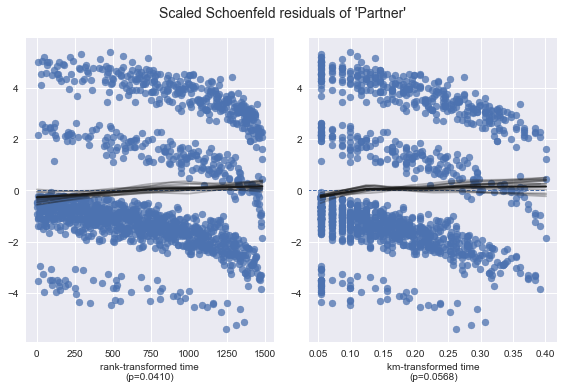

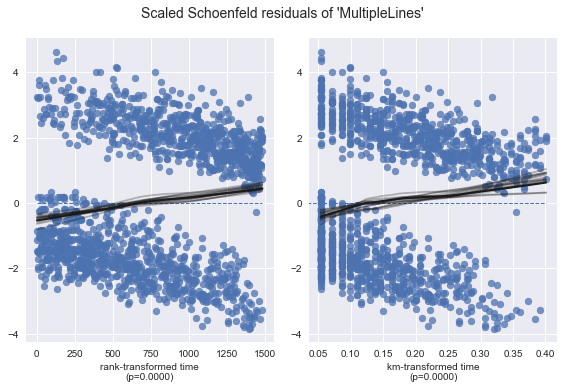

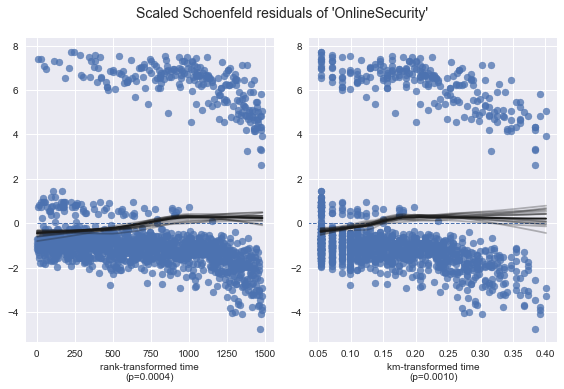

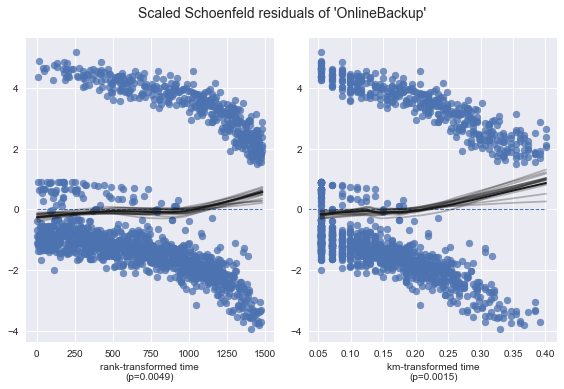

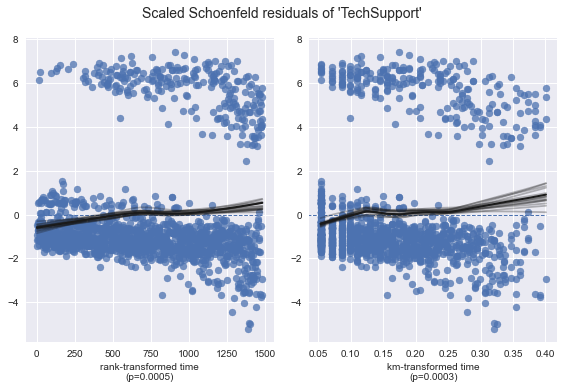

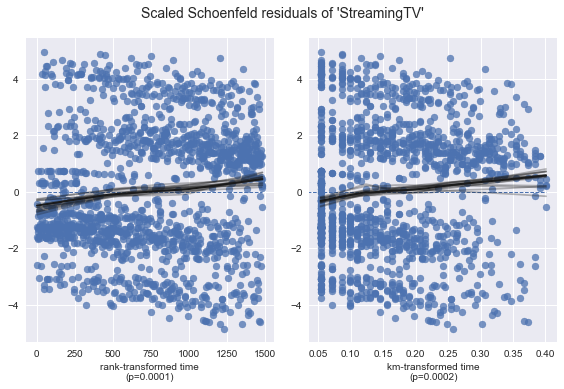

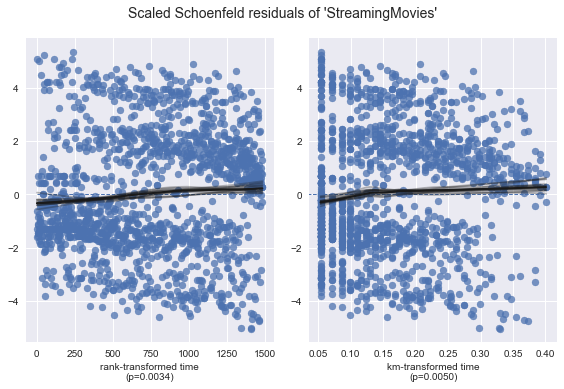

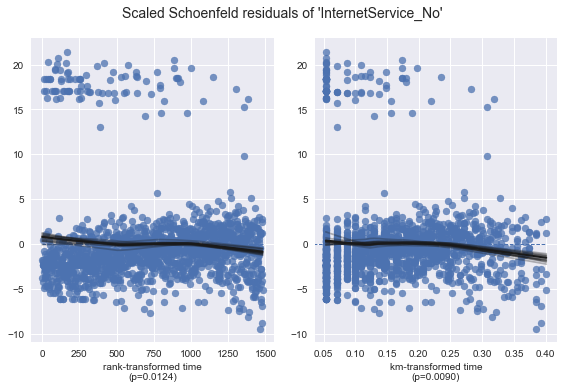

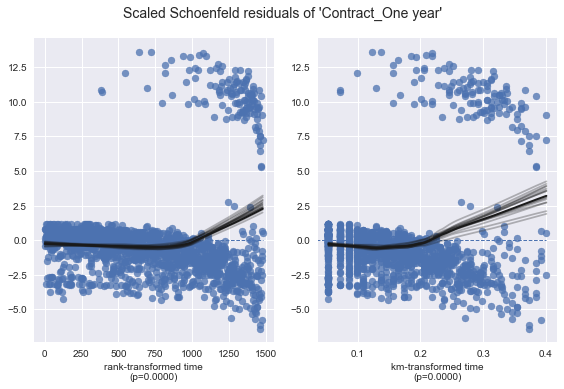

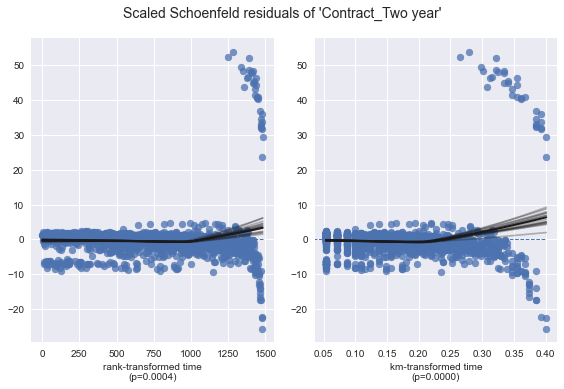

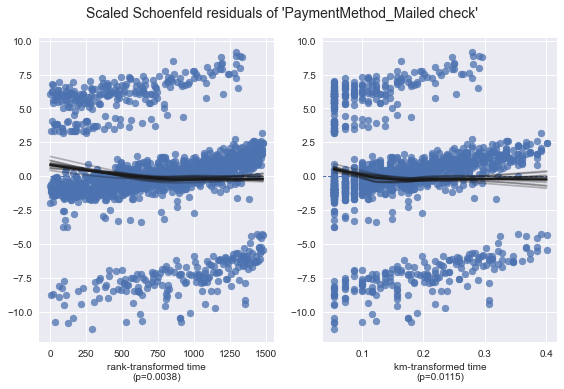

In [82]:
cph.check_assumptions(df_train,p_value_threshold=0.05,show_plots=True)

As we can see from above graph that almost all covariates have similar change in time for most of the records and there is no high deviation between two subgroups of the covariates

In [ ]:
# If the check assumptions will show high variation in time for subgroups of covariates then 
# we can implement stratification on those covariates to fullfill the COXph assumptions
# # Training the Model
# cph1 = CoxPHFitter()
# cph1.fit(df_train, duration_col = 'tenure', event_col = 'Churn',strata = [''])
# cph1.print_summary()

<AxesSubplot:xlabel='log(HR) (95% CI)'>

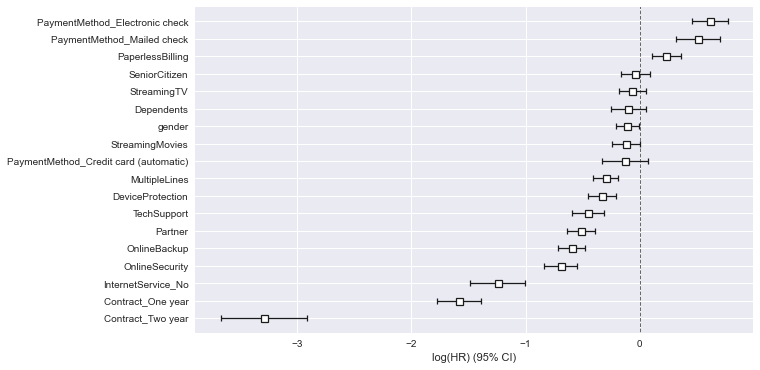

In [63]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [79]:
prediction_df = pd.DataFrame({'prediction':cph.predict_expectation(df_test),'Actual':df_test['tenure'],\
                              'Delta':df_test['tenure']-cph.predict_expectation(df_test)})
prediction_df.head()

,prediction,Actual,Delta
4129-LYCOI,70.040086,67,-3.040086
7919-ZODZZ,63.381957,10,-53.381957
4067-HLYQI,20.236143,33,12.763857
3312-ZWLGF,35.748201,29,-6.748201
9323-HGFWY,67.961999,27,-40.961999


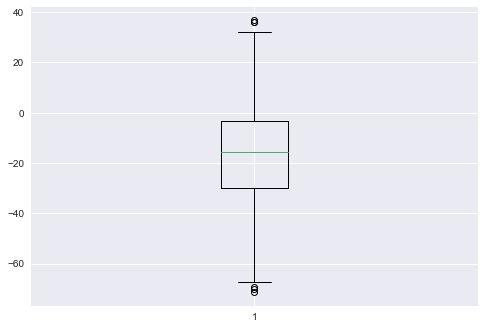

(array([ 14.,  49., 120., 199., 257., 336., 327.,  73.,  27.,   7.]),
 array([-71.41960112, -60.60345922, -49.78731731, -38.97117541,
        -28.15503351, -17.3388916 ,  -6.5227497 ,   4.2933922 ,
         15.10953411,  25.92567601,  36.74181791]),
 <BarContainer object of 10 artists>)

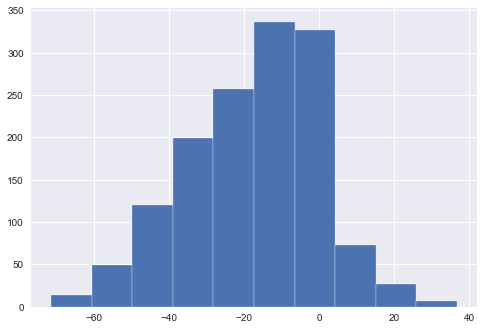

In [86]:
plt.boxplot(prediction_df['Delta'])
plt.show()
plt.hist(prediction_df['Delta'])

<AxesSubplot:>

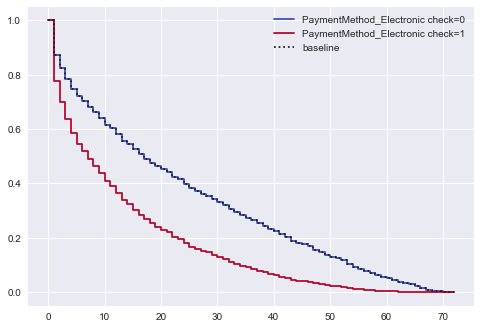

In [65]:
cph.plot_partial_effects_on_outcome(covariates = 'PaymentMethod_Electronic check', values = [0,1], cmap = 'coolwarm')

<AxesSubplot:>

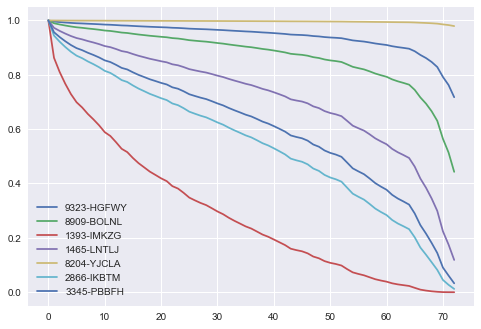

In [69]:
cust = df_test.iloc[4:11,:-2]
cust

# predicting the survival curve for the selected customers
cph.predict_survival_function(cust).plot()

In [78]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(cph, df_test.iloc[:,:-2], df_test['tenure'], df_test['Churn'],
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

ModuleNotFoundError: No module named 'pysurvival'

In [ ]:
cph.

In [1]:
# def hypertuning(model, params, n_iter, X,y):
#     print('Tuning Hyperparameters.....')
#     gridSearch = GridSearchCV(estimator=model, param_grid=params, cv = 3, n_jobs=-1, \
#                                       ) # 3 fold CV.
#     #n_iter=n_iter
#     gridSearch.fit(X,y) # Using train data with 3-fold cross validation to tune hyperparameters
#     best_parameters = gridSearch.best_params_
#     best_score = gridSearch.best_score_
#     return best_parameters, best_score

In [2]:
# # Hyperparameters of COXPHFitter Regression for Tunning purposes
# cph = CoxPHFitter()

# cph_reg_params = {
#     'alpha':[0.05,0.02],
#     'baseline_estimation_method': ['breslow','spline','piecewise'],
#     'penalizer':[0,0.01,0.02,0.1,0.4,0.8,1],
#     'l1_ratio': [0,0.01,0.02,0.1,0.4,0.8,1]
# }

In [3]:
df_train1,df_test1 = train_test_split(model_df, test_size = 0.20)

NameError: name 'train_test_split' is not defined

In [ ]:
df_train2,df_test2 = train_test_split(model_df, test_size = 0.20)

In [ ]:
cph = CoxPHFitter()
k_fold_cross_validation(cph,df_train,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

In [ ]:
k_fold_cross_validation(cph,df_test,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

In [ ]:
# gridSearch_cph = GridSearchCV(estimator=cph, param_grid=cph_reg_params, cv = 3, n_jobs=-1, scoring = 'Concordance_Index')
# gridSearch_cph.fit(model_df,duration_col='tenure', event_col='Churn') # Using train data with 3-fold cross validation to tune hyperparameters
# best_parameters_cph = gridSearch_cph.best_params_
# best_score_cph = gridSearch_cph.best_score_

In [ ]:
# np.random.seed(0)
# df_dev, df_test = train_test_split(model_df, test_size = 0.10) #Spliting model_df into dev(train, validation) and test data
# df_train, df_val = train_test_split(df_dev, test_size = 0.20) #Spliting dev into train, and validation data

In [ ]:
cph1 = CoxPHFitter()
cph1.fit(df_train1, duration_col = 'tenure', event_col = 'Churn')
cph1.print_summary()

In [ ]:
k_fold_cross_validation(cph1,df_train1,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

In [ ]:
k_fold_cross_validation(cph1,df_test1,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

In [ ]:
cph2 = CoxPHFitter()
cph2.fit(df_train2, duration_col = 'tenure', event_col = 'Churn')
cph2.print_summary()

In [ ]:
k_fold_cross_validation(cph1,df_test1,duration_col = 'tenure',event_col = 'Churn',k=5,scoring_method = 'concordance_index')

In [ ]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [ ]:
cph.fit(df_val, duration_col = 'tenure', event_col = 'Churn')
cph.print_summary()

In [ ]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [ ]:
cph.predict_cumulative_hazard(df_val)

In [ ]:
cph.predict_median(df_val)

In [ ]:
pd.DataFrame({'prediction':cph.predict_expectation(df_val),'Actual':df_val['tenure']})

In [ ]:
cph.predict_percentile(df_val)

In [ ]:
pd.DataFrame({'prediction':cph.predict_expectation(df_test),'Actual':df_test['tenure']})

In [ ]:
# validating the survival curve for the selected customers
cph.predict_survival_function(df_test.iloc[50:54,:-2]).plot()

In [ ]:
# Hyperparameters of Weibullfitter Regression for Tunning purposes
weibAFT = CoxPHFitter()(random_state = 42)

weibAFT_reg_params = {
    'alpha':[0.05,0.02],
    'penalizer':[0,0.01,0.02,0.1,0.4,0.8,1],
    'l1_ratio': [0,0.01,0.02,0.1,0.4,0.8,1]
}

In [ ]:
# Creating CoxPH Fitter instance
cph = CoxPHFitter()

# Fitting the data to the model
cph.fit(df_with_dummy.loc[:, features_with_no_multicolinearity], duration_col='tenure', event_col='Churn')
cph.print_summary()

- P values tell you how significant the feature is.
- exp(coef) tell you how much an increase in your feature will contribute to the hazard.
- Concordance tells you how better your model have performed (ranges between 0 & 1) the more the concardance the better.

the power of predictibility of survival

- **concordance of 0.5 tells you that there is 50% chance**

- **Survival model requires censored data.**

In [ ]:
plt.subplots(figsize = (10, 6))
cph.plot()

In [ ]:
cph.plot_partial_effects_on_outcome(covariates = 'TotalCharges', values = [50, 200, 400, 1000], cmap = 'coolwarm')

In [ ]:
cph.plot_partial_effects_on_outcome(covariates = 'MultipleLines_Yes', values = [0,1], cmap = 'coolwarm')

In [ ]:
# select 6 random customers to see their survival curves
model_df = df_with_dummy.loc[:, features_with_no_multicolinearity]
cust = model_df.iloc[5:10,:-2]
cust

In [ ]:
# predicting the survival curve for the selected customers
cph.predict_survival_function(cust).plot()

- Customer 26 has a longer survival rate as the probability of survival is becoming 0 between 65 to 70 months
    i.e. Customer 26 will take longer period to get churn out.

- Customer 20,27,22 has a shorter survival rate as the probability of survival is becoming 0 between 0 to 5 months
    i.e. Customer 20,27,22 will take shorter period to get churn out.

In [ ]:
cust2 = model_df.iloc[50:54,:-2]
cust2

In [ ]:
# predicting the survival curve for the selected customers
cph.predict_survival_function(cust2).plot()

# Accelerated Failure Time (AFT) Model

In [ ]:
from lifelines import WeibullFitter,\
                      ExponentialFitter,\
                      LogNormalFitter,\
                      LogLogisticFitter
# Instantiate each fitter
wb = WeibullFitter()
ex = ExponentialFitter()
log = LogNormalFitter()
loglogis = LogLogisticFitter()
# Fit to data
for model in [wb, ex, log, loglogis]:
    model.fit(durations = model_df["tenure"], event_observed = model_df["Churn"])
    # Print AIC
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

As the AIC value (information score of the model) of WeibullFitter is lower we will select WeibullFitter as our AFT model

In [ ]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(model_df, duration_col='tenure', event_col='Churn')
weibull_aft.print_summary(3)

In [ ]:
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

In [ ]:
cph.baseline_hazard_

In [ ]:
cph.plot()

In [ ]:
# select only categorical columns
raw_df.select_dtypes(include=['object']).info()

In [ ]:
# select only categorical columns
raw_df.select_dtypes(include=['object']).info()

In [ ]:
# select only numeric columns
raw_df._get_numeric_data()

In [ ]:
convert_to_structured(raw_df['tenure'], raw_df['churn'])

In [ ]:
# As we can see that there are no Null values
raw_df.isnull().sum()

In [ ]:
# 